In [13]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import wilcoxon

%matplotlib widget

In [14]:
%%html
<style>
.cell-output-ipywidget-background {
   background-color: transparent !important;
}
.jp-OutputArea-output {
   background-color: transparent;
}  
</style>

In [15]:
 # SAS features 
pre_sas_on = np.array((8,2,12,17,11,22,2,5,13,4,11,7,7,16,9,8,9,13,10,11,6,5,17,12,11,21,9)).T
post_sas_on = np.array((21,3,19,13,13,14,11,12,23,12,4,6,11,28,17,8,21,8,17,11,9,20,17,19,15,19,11)).T
per_change = (pre_sas_on-post_sas_on)/pre_sas_on
pre_sas_off = np.array((13,2,9,20,21,12,3,27,22,29,30,17,13,27,9,8,16,31,10,2,8,5,17,14,8,12,8))
lct_change = (pre_sas_off-pre_sas_on)/pre_sas_off
dbs_change = (post_sas_on-pre_sas_off)/pre_sas_off
# Apathy features
ap = np.array(('Y','N','Y','Y','Y','Y','N','Y','Y','Y','Y','Y','N','Y','Y','N','Y','Y','Y','Y','N','N','Y','N','Y','N','N')).T
ap[ap=='Y'] = 1 
ap[ap=='N'] = 0
bi_sas = ap
n_cases = pre_sas_on.__len__()

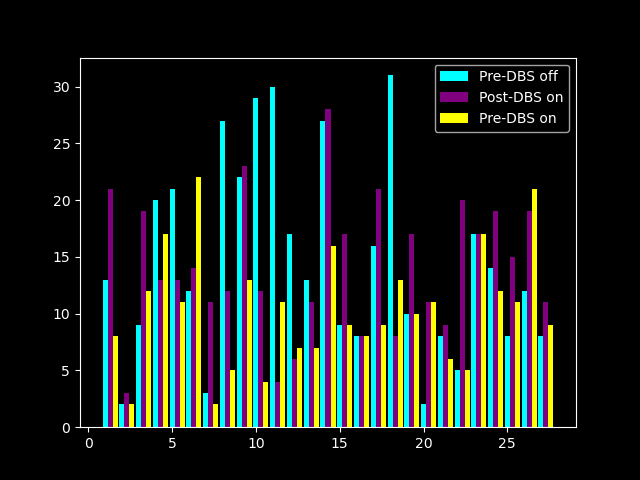

In [16]:
[fig, ax] = plt.subplots()
width = 0.3
ax.bar(np.arange(1,n_cases+1),pre_sas_off,width=width,color='cyan')
ax.bar(np.arange(1,n_cases+1)+width,post_sas_on,width=width,color='purple')
ax.bar(np.arange(1,n_cases+1)+2*width,pre_sas_on,width=width,color='yellow')
plt.style.use('dark_background')
plt.legend(['Pre-DBS off','Post-DBS on','Pre-DBS on'])
plt.show()

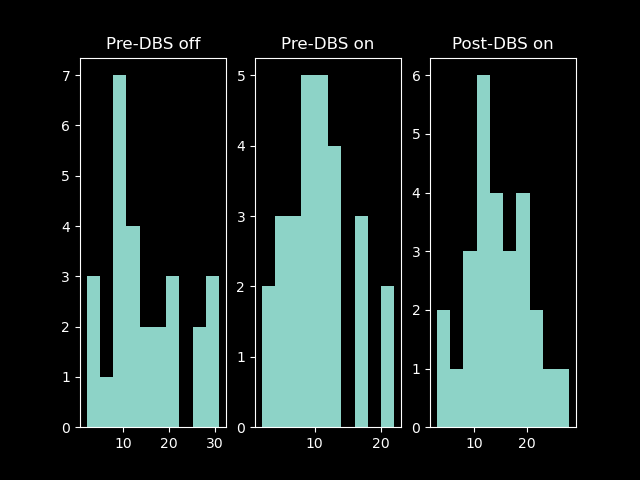

In [17]:
# Only the post-DBS on distribution looks approximately normal
# Perform non-parametric Wilcoxon tests
[fig, ax] = plt.subplots(1,3)
label = ['Pre-DBS off','Post-DBS on', 'Pre-DBS on']
ax[0].hist([pre_sas_off])
ax[1].hist([pre_sas_on])
ax[2].hist([post_sas_on])

ax[0].set_title('Pre-DBS off')
ax[1].set_title('Pre-DBS on')
ax[2].set_title('Post-DBS on')
plt.style.use('dark_background')
plt.show()

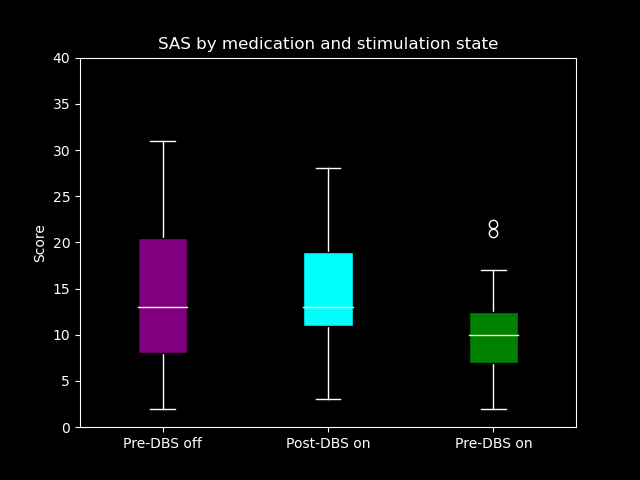

In [35]:
[fig, ax] = plt.subplots()
label = ['Pre-DBS off','Post-DBS on', 'Pre-DBS on']
bplots = ax.boxplot([pre_sas_off,post_sas_on,pre_sas_on],labels=label,patch_artist=True,capprops=dict(color='white'),whiskerprops=dict(color='white'),flierprops=dict(color='white', markeredgecolor='white'))
ax.set_ylim([0,40])
# fill with colors
colors = ['purple', 'cyan', 'green']
for bplot in bplots:
    for patch, color in zip(bplots['boxes'], colors):
        patch.set_facecolor(color)
ax.set_ylabel('Score')
plt.title('SAS by medication and stimulation state')
plt.style.use('dark_background')
plt.show()

In [19]:
# UPDRS features
subject_id = np.array((1,2,3,6,9,10,11,12,13,15,16,20,25,26,27,28,29,34,35,41,43,44,45,46,52,54))
pre_updrs_iii_off = np.array((65,22,45,63,63,27,57,42,54,67,33,27,50,77,43,31,56,81,40,28,52,32,33,18,58,63))
pre_updrs_iii_on = np.array((54,7,13,32,21,14,11,14,28,65,9,4,26,55,14,8,24,20,17,0,29,13,26,0,27,36))
post_updrs_iii_off = np.array((11,2,20,3,7,11,15,21,16,21,4,9,15,9,11,4,8,25,13,16,7,26,2,8,19,8))
per_change = (pre_updrs_iii_off-post_updrs_iii_off)/pre_updrs_iii_off
lct_change = (pre_updrs_iii_off-pre_updrs_iii_on)/(pre_updrs_iii_off)

/data/Ali/anaconda3/envs/pdradenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


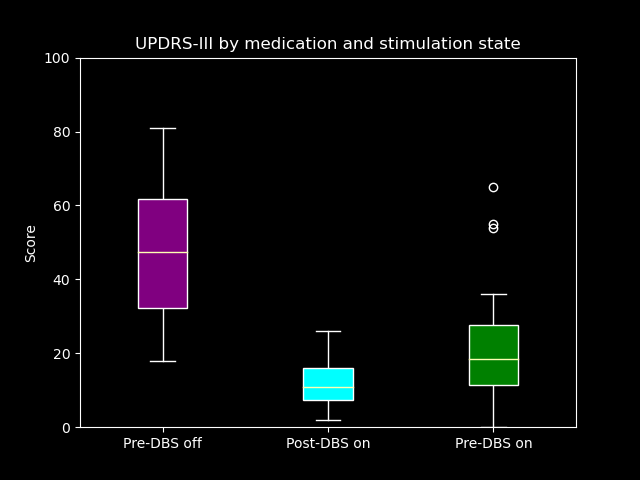

In [45]:
[fig, ax] = plt.subplots()
label = ['Pre-DBS off','Post-DBS on', 'Pre-DBS on']
bplots = ax.boxplot([pre_updrs_iii_off,post_updrs_iii_off,pre_updrs_iii_on],labels=label,patch_artist=True,capprops=dict(color='white'),whiskerprops=dict(color='white'),flierprops=dict(color='white', markeredgecolor='white'))
# fill with colors
colors = ['purple', 'cyan', 'green']
for bplot in bplots:
    for patch, color in zip(bplots['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_edgecolor('white')
        
ax.set_ylabel('Score')
ax.set_ylim([0,100])
plt.title('UPDRS-III by medication and stimulation state')
plt.style.use('dark_background')
plt.show()

In [42]:
# Compare UPDRS change after medication
# Significantly greater UPDRS before medication
res_pre_off_on = wilcoxon(pre_updrs_iii_off-pre_updrs_iii_on,alternative='greater')
res_pre_off_on.statistic, res_pre_off_on.pvalue

res_pre_post = wilcoxon(pre_updrs_iii_off-post_updrs_iii_off,alternative='greater')
res_pre_post.statistic, res_pre_post.pvalue

(351.0, 4.14210046211633e-06)

In [22]:
# BAI features
subject_id = np.array((1,2,5,6,8,9,10,11,12,13,14,16,20,24,25,26))
pre_bai_on = np.array((42,3,46,4,40,13,22,34,2,40,4,4,13,44,4,23))
pre_bai_off = np.array((47,2,63,13,22,18,27,27,12,29,6,0.1,28,46,2,23))
pre_bai_off[pre_bai_off == 0] = 0.1
post_bai_on = np.array((35,1,13,4,1,12,21,9,2,59,3,2,17,39,4,19))
per_change = (pre_bai_on-post_bai_on)/pre_bai_on
lct_change = (pre_bai_off-pre_bai_on)/pre_bai_off

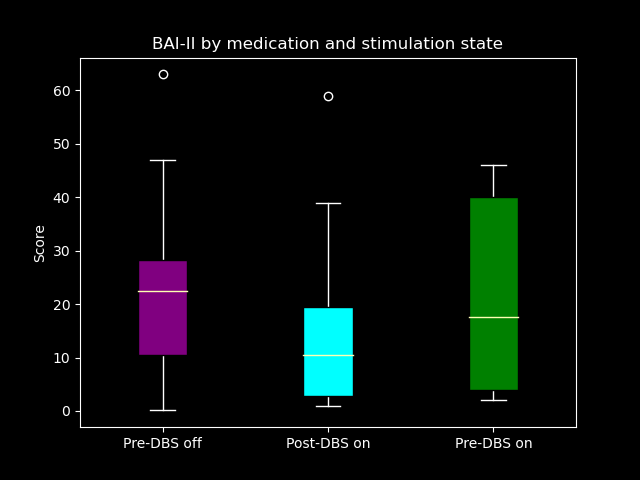

In [37]:
[fig, ax] = plt.subplots()
label = ['Pre-DBS off','Post-DBS on', 'Pre-DBS on']
bplots = ax.boxplot([pre_bai_off,post_bai_on,pre_bai_on],labels=label,patch_artist=True,capprops=dict(color='white'),whiskerprops=dict(color='white'),flierprops=dict(color='white', markeredgecolor='white'))
# fill with colors
colors = ['purple', 'cyan', 'green']
for bplot in bplots:
    for patch, color in zip(bplots['boxes'], colors):
        patch.set_facecolor(color)
ax.set_ylabel('Score')
plt.title('BAI-II by medication and stimulation state')
plt.style.use('dark_background')
plt.show()